<a href="https://colab.research.google.com/github/krisnaaquino/dados/blob/main/Projeto_Mining_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**MINING HEALTH –   MINERAÇÃO DE DADOS PARA PREDIÇÃO E DIAGNÓSTICO PRECOCE DE DOENÇAS **



**Sistema de Informação sobre Mortalidade – SIM**

O Sistema de Informação sobre Mortalidade (SIM), desenvolvido pelo Ministério da Saúde em 1975, é produto da unificação de mais de quarenta modelos de Declaração de Óbito utilizados ao longo dos anos, para coletar dados sobre mortalidade no país. Com sua longa série temporal, o SIM é um patrimônio nacional, visto que possui informações fundamentais para que possamos conhecer os aspectos referentes à mortalidade no Brasil e às causas de adoecimento que levaram ao óbito. É, ainda, **um dos principais instrumentos para apoiar a elaboração de políticas públicas de saúde e seguridade social mais efetivas visando à prevenção, promoção e cuidado em saúde.**


Base de Dados: Base de Registros de 2021: https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/Mortalidade_Geral_2021.csv



Dicionário de dados:
https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf

head() irá mostrar por padrão as 5 primeiras linhas do que existe dentro de um conjunto de dados dentro de um objeto do pandas

In [ ]:
import pandas as pd
#(importando arquivo csv completo)
#dados = pd.read_csv("https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/Mortalidade_Geral_2021.csv",  sep=";")
dados.head()


In [17]:
import pandas as pd
#importando arquivo csv com os atributos selecionados
dados = pd.read_csv("https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/Mortalidade_Geral_2021.csv", usecols =['CODMUNRES','CAUSABAS','CODMUNNATU','IDADE','SEXO','RACACOR','ESTCIV', 'ESC','ESC2010','OCUP','CODMUNRES','CODMUNOCOR','LOCOCOR','ATESTADO'],sep=';' )
dados.head()

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO
0,110020.0,458,1,4.0,2.0,3.0,2.0,NaN,120040,1,120040,B342,J960/R570/R092/B342 U071
1,120050.0,450,1,4.0,2.0,3.0,2.0,NaN,120001,1,120040,B342,A418/J189/N179/B342 U071
2,120040.0,464,2,4.0,1.0,3.0,2.0,999993.0,120040,1,120040,B342,A419/J189/B342 U071/N179*I10
3,120050.0,422,1,4.0,1.0,9.0,9.0,999991.0,120050,1,110020,C480,J960/C780/C782/C480*C787
4,120020.0,304,1,4.0,NaN,NaN,NaN,NaN,120060,1,120060,J128,R50/J128


O comando inverso ao head() é o tail(), que irá mostrar as 5 últimas linhas do DataFrame por padrão:

In [ ]:
dados.tail

<bound method NDFrame.tail of          CODMUNNATU  IDADE  SEXO  RACACOR  ESTCIV  ESC  ESC2010      OCUP  \
0          110020.0    458     1      4.0     2.0  3.0      2.0       NaN   
1          120050.0    450     1      4.0     2.0  3.0      2.0       NaN   
2          120040.0    464     2      4.0     1.0  3.0      2.0  999993.0   
3          120050.0    422     1      4.0     1.0  9.0      9.0  999991.0   
4          120020.0    304     1      4.0     NaN  NaN      NaN       NaN   
...             ...    ...   ...      ...     ...  ...      ...       ...   
1832644    171240.0    465     1      4.0     2.0  1.0      0.0  621005.0   
1832645    521380.0    470     1      1.0     2.0  4.0      3.0  621005.0   
1832646    210530.0    454     1      4.0     NaN  NaN      NaN       NaN   
1832647    231140.0    459     1      4.0     2.0  4.0      3.0  621005.0   
1832648    210160.0    475     2      4.0     3.0  3.0      1.0  621005.0   

         CODMUNRES  LOCOCOR  CODMUNOCOR CAUSA

In [2]:
dados.shape

(1832649, 13)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556824 entries, 0 to 1556823
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   CODMUNNATU  1446983 non-null  float64
 1   IDADE       1556824 non-null  int64  
 2   SEXO        1556824 non-null  int64  
 3   RACACOR     1516188 non-null  float64
 4   ESTCIV      1475822 non-null  float64
 5   ESC         1442466 non-null  float64
 6   ESC2010     1437863 non-null  float64
 7   OCUP        1306818 non-null  float64
 8   CODMUNRES   1556824 non-null  int64  
 9   LOCOCOR     1556824 non-null  int64  
 10  CODMUNOCOR  1556824 non-null  int64  
 11  CAUSABAS    1556824 non-null  object 
 12  ATESTADO    1556824 non-null  object 
dtypes: float64(6), int64(5), object(2)
memory usage: 154.4+ MB


In [ ]:
dados.dtypes

CODMUNNATU    float64
IDADE           int64
SEXO            int64
RACACOR       float64
ESTCIV        float64
ESC           float64
ESC2010       float64
OCUP          float64
CODMUNRES       int64
LOCOCOR         int64
CODMUNOCOR      int64
CAUSABAS       object
ATESTADO       object
dtype: object

In [ ]:
dados.columns

Index(['CODMUNNATU', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010',
       'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODMUNOCOR', 'CAUSABAS', 'ATESTADO'],
      dtype='object')

Um comando muito útil para avaliar uma Series é o .describe(), que irá calcular os quartis, valores máximo, mínimo, a média e o desvio padrão.

In [ ]:
dados.describe()

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR
count,1.718823e+06,1.832649e+06,1.832649e+06,1.790300e+06,1.748160e+06,1.713446e+06,1.707326e+06,1.562596e+06,1.832649e+06,1.832649e+06,1.832649e+06
mean,3.210545e+05,4.629137e+02,1.445221e+00,2.243315e+00,2.572225e+00,3.541111e+00,2.552520e+00,7.707295e+05,3.312414e+05,1.634530e+00,3.314090e+05
std,8.373553e+04,4.501474e+01,4.977396e-01,1.418723e+00,1.764039e+00,2.269533e+00,2.649229e+00,2.759883e+05,8.899479e+04,1.061230e+00,8.894762e+04
min,1.100000e+05,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.010500e+04,1.100000e+05,1.000000e+00,1.100000e+05
25%,2.611600e+05,4.550000e+02,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,6.120050e+05,2.903700e+05,1.000000e+00,2.904500e+05
50%,3.161200e+05,4.690000e+02,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,9.989990e+05,3.304550e+05,1.000000e+00,3.304550e+05
75%,3.550300e+05,4.810000e+02,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,9.999930e+05,3.551500e+05,2.000000e+00,3.550800e+05
max,5.300100e+05,9.990000e+02,2.000000e+00,5.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.999950e+05,5.300100e+05,9.000000e+00,5.300100e+05


# Idade do falecido em minutos, horas, dias, meses ou anos. (Idade: composto de dois subcampos. - O primeiro, de 1 dígito, indica a unidade da idade (se 1 = minuto, se 2 = hora, se 3 = mês, se 4 = ano, se = 5 idade maior que 100 anos). - O segundo, de dois dígitos, indica a quantidade de unidades: Idade menor de 1 hora: subcampo varia de 01 e 59 (minutos); De 1 a 23 Horas: subcampo varia de 01 a 23 (horas); De 24 horas e 29 dias: subcampo varia de 01 a 29 (dias); De 1 a menos de 12 meses completos: subcampo varia de 01 a 11 (meses); Anos - subcampo varia de 00 a 99; - 9 - ignorado)

In [18]:
#SELECIONAR  IDADE 400
dados.query('IDADE>=400 and IDADE<=600' ,inplace=True)

In [ ]:
maxIdade = dados['IDADE'].max()
maxIdade

524

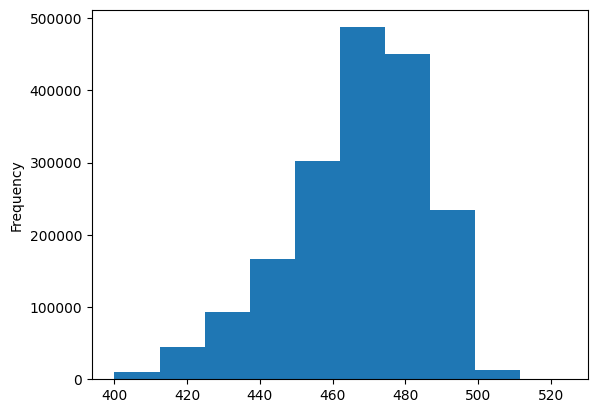

In [ ]:
dados.IDADE.plot.hist();

SUBTRAIR 400 IDADE

In [19]:
dados['IDADE2']=dados['IDADE'].apply(lambda x: x-400 if x >=400 else x)


In [ ]:
dados.IDADE2.describe()

count    1.798422e+06
mean     6.679996e+01
std      1.872722e+01
min      0.000000e+00
25%      5.600000e+01
50%      6.900000e+01
75%      8.100000e+01
max      1.240000e+02
Name: IDADE2, dtype: float64

In [ ]:
maxIdade2 = dados['IDADE2'].max()
maxIdade2

124

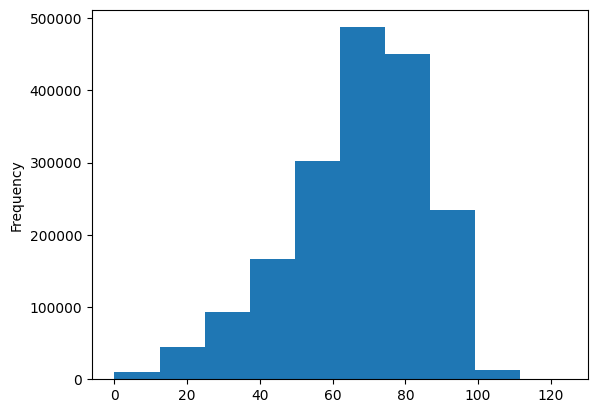

In [ ]:
dados.IDADE2.plot.hist();

In [ ]:
minIdade2 = dados['IDADE2'].min()
minIdade2

0

<Axes: xlabel='SEXO', ylabel='CODMUNOCOR'>

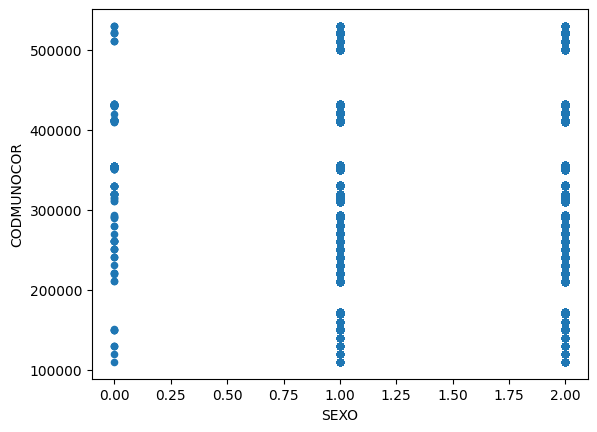

In [ ]:
dados.plot.scatter(x='SEXO',y='CODMUNOCOR')

In [ ]:
import seaborn as sns
sns.jointplot(data=dados,x='CODMUNOCOR',y='IDADE2',hue='SEXO')

In [ ]:
dados.isnull().sum()

CODMUNNATU    106571
IDADE              0
SEXO               0
RACACOR        37466
ESTCIV         48386
ESC            81740
ESC2010        86250
OCUP          216771
CODMUNRES          0
LOCOCOR            0
CODMUNOCOR         0
CAUSABAS           0
ATESTADO           0
IDADE2             0
dtype: int64

#Eliminando valores vazios

In [20]:
dados.dropna(axis=0, how='all')

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2
0,110020.0,458,1,4.0,2.0,3.0,2.0,NaN,120040,1,120040,B342,J960/R570/R092/B342 U071,58
1,120050.0,450,1,4.0,2.0,3.0,2.0,NaN,120001,1,120040,B342,A418/J189/N179/B342 U071,50
2,120040.0,464,2,4.0,1.0,3.0,2.0,999993.0,120040,1,120040,B342,A419/J189/B342 U071/N179*I10,64
3,120050.0,422,1,4.0,1.0,9.0,9.0,999991.0,120050,1,110020,C480,J960/C780/C782/C480*C787,22
5,120034.0,477,1,4.0,2.0,9.0,9.0,999993.0,120050,1,120050,I694,E43/I694*I10,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832644,171240.0,465,1,4.0,2.0,1.0,0.0,621005.0,170310,3,170310,I110,J81/I509/I10/C61,65
1832645,521380.0,470,1,1.0,2.0,4.0,3.0,621005.0,170210,1,170210,I350,R570/Y831/I350*I10,70
1832646,210530.0,454,1,4.0,NaN,NaN,NaN,NaN,171880,3,171880,R99,R99,54
1832647,231140.0,459,1,4.0,2.0,4.0,3.0,621005.0,171070,2,210530,I219,R570/I219/I251/G20*F172,59


In [6]:
dados.shape

(1798422, 14)

In [23]:
dados.dropna(axis=1, how='any')

,IDADE,SEXO,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2
0,458,1,120040,1,120040,B342,J960/R570/R092/B342 U071,58
1,450,1,120001,1,120040,B342,A418/J189/N179/B342 U071,50
2,464,2,120040,1,120040,B342,A419/J189/B342 U071/N179*I10,64
3,422,1,120050,1,110020,C480,J960/C780/C782/C480*C787,22
5,477,1,120050,1,120050,I694,E43/I694*I10,77
...,...,...,...,...,...,...,...,...
1832644,465,1,170310,3,170310,I110,J81/I509/I10/C61,65
1832645,470,1,170210,1,170210,I350,R570/Y831/I350*I10,70
1832646,454,1,171880,3,171880,R99,R99,54
1832647,459,1,171070,2,210530,I219,R570/I219/I251/G20*F172,59


In [22]:
dados.dropna(axis=0, how='any')

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2
2,120040.0,464,2,4.0,1.0,3.0,2.0,999993.0,120040,1,120040,B342,A419/J189/B342 U071/N179*I10,64
3,120050.0,422,1,4.0,1.0,9.0,9.0,999991.0,120050,1,110020,C480,J960/C780/C782/C480*C787,22
5,120034.0,477,1,4.0,2.0,9.0,9.0,999993.0,120050,1,120050,I694,E43/I694*I10,77
7,120060.0,486,1,2.0,5.0,2.0,1.0,999993.0,120050,3,120050,C61,C61*I10,86
8,120050.0,469,2,3.0,3.0,9.0,9.0,999993.0,120050,1,120050,E142,J969/N179/E149/I10,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832643,170550.0,423,2,4.0,1.0,4.0,3.0,999991.0,170230,1,170210,A91,I629/D65/A91,23
1832644,171240.0,465,1,4.0,2.0,1.0,0.0,621005.0,170310,3,170310,I110,J81/I509/I10/C61,65
1832645,521380.0,470,1,1.0,2.0,4.0,3.0,621005.0,170210,1,170210,I350,R570/Y831/I350*I10,70
1832647,231140.0,459,1,4.0,2.0,4.0,3.0,621005.0,171070,2,210530,I219,R570/I219/I251/G20*F172,59


In [24]:
dados.dropna(axis=1,how='all')

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2
0,110020.0,458,1,4.0,2.0,3.0,2.0,NaN,120040,1,120040,B342,J960/R570/R092/B342 U071,58
1,120050.0,450,1,4.0,2.0,3.0,2.0,NaN,120001,1,120040,B342,A418/J189/N179/B342 U071,50
2,120040.0,464,2,4.0,1.0,3.0,2.0,999993.0,120040,1,120040,B342,A419/J189/B342 U071/N179*I10,64
3,120050.0,422,1,4.0,1.0,9.0,9.0,999991.0,120050,1,110020,C480,J960/C780/C782/C480*C787,22
5,120034.0,477,1,4.0,2.0,9.0,9.0,999993.0,120050,1,120050,I694,E43/I694*I10,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832644,171240.0,465,1,4.0,2.0,1.0,0.0,621005.0,170310,3,170310,I110,J81/I509/I10/C61,65
1832645,521380.0,470,1,1.0,2.0,4.0,3.0,621005.0,170210,1,170210,I350,R570/Y831/I350*I10,70
1832646,210530.0,454,1,4.0,NaN,NaN,NaN,NaN,171880,3,171880,R99,R99,54
1832647,231140.0,459,1,4.0,2.0,4.0,3.0,621005.0,171070,2,210530,I219,R570/I219/I251/G20*F172,59


O método pandas.DataFrame.duplicated() é usado para localizar linhas duplicadas em um DataFrame. Ele retorna uma série booleana que identifica se uma linha é duplicada ou única.

Neste artigo, você aprenderá como usar esse método para identificar as linhas duplicadas em um DataFrame. Você também conhecerá algumas dicas práticas para usar esse método.

In [ ]:
dados.duplicated()

0          False
1          False
2          False
3          False
5          False
           ...  
1832644    False
1832645    False
1832646    False
1832647    False
1832648    False
Length: 1798422, dtype: bool

In [26]:
#criar coluna covid true ou false
dados['COVID']= dados.CAUSABAS.apply(lambda x: True if x=='B342' else False )

In [27]:
dados[dados.duplicated()]

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2,COVID
4619,120050.0,472,2,4.0,4.0,2.0,1.0,999993.0,120040,3,120040,R99,R99,72,False
4820,130070.0,483,1,4.0,2.0,1.0,0.0,999993.0,120040,3,120040,R99,R99,83,False
4860,130070.0,479,2,4.0,1.0,2.0,1.0,999992.0,120040,3,120040,R99,R99,79,False
5493,120034.0,401,1,5.0,NaN,NaN,NaN,NaN,120034,6,120034,R99,R99,1,False
18588,270430.0,418,1,4.0,1.0,4.0,2.0,999994.0,270430,4,270430,X954,S069/X954,18,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811398,353870.0,491,2,1.0,3.0,3.0,1.0,999992.0,353870,3,353870,R98,R98,91,False
1811400,353870.0,490,2,1.0,3.0,3.0,1.0,999992.0,353870,3,353870,R99,R99,90,False
1816608,355030.0,436,1,4.0,1.0,3.0,2.0,998999.0,355030,3,355030,R99,R99,36,False
1817294,355030.0,418,1,4.0,1.0,3.0,2.0,999994.0,355030,1,355030,R99,R99,18,False


In [ ]:
dados.SEXO.value_counts(normalize=True)


1    0.553757
2    0.446152
0    0.000091
Name: SEXO, dtype: float64

In [28]:
dados['SEXO']=dados['SEXO'].replace([0,1, 2] ,['Indefinido','Masculino' , 'Feminino' ])

<Axes: ylabel='SEXO'>

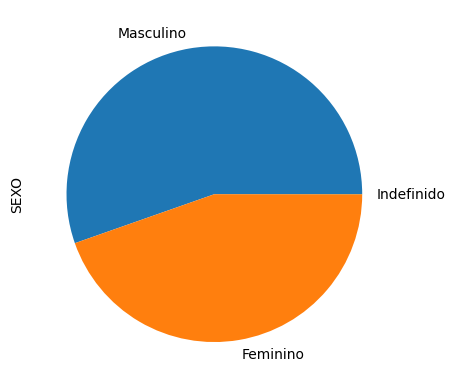

In [ ]:
dados.SEXO.value_counts(normalize=True).plot(kind='pie')

<Axes: >

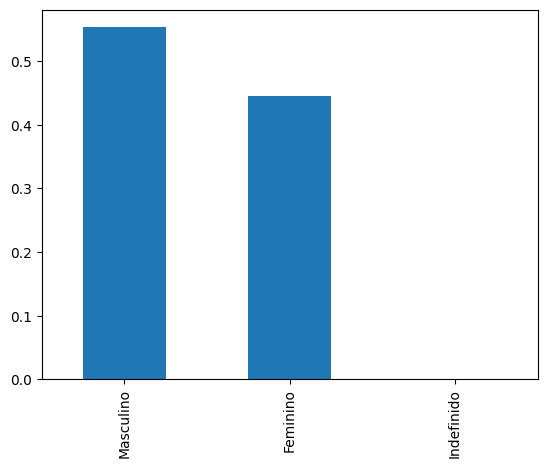

In [ ]:
dados.SEXO.value_counts(normalize=True).plot(kind='bar')


In [ ]:
dados.RACACOR.value_counts(normalize=True)

1.0    0.506753
4.0    0.395535
2.0    0.088183
3.0    0.006322
5.0    0.003207
Name: RACACOR, dtype: float64

<Axes: >

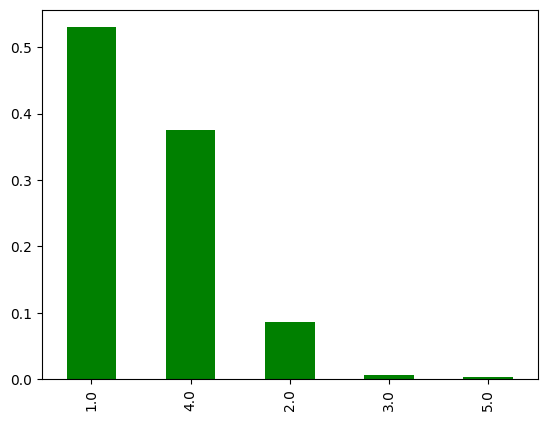

In [ ]:
dados.RACACOR.value_counts(normalize=True).plot(kind='bar', color='green')

RACACOR =Cor informada pelo responsável pelas informações do falecido. (1 – Branca; 2 – Preta; 3 – Amarela; 4 – Parda; 5 – Indígena)

In [ ]:
dados.LOCOCOR.value_counts(normalize=True)

1    0.657882
3    0.212913
2    0.065396
4    0.033415
5    0.029733
9    0.000596
6    0.000066
Name: LOCOCOR, dtype: float64

Local
de ocorrência do óbito. (1 – hospital; 2 – outros
estabelecimentos de
saúde; 3 – domicílio; 4 – via pública; 5 – outros; 6 - aldeia indígena; 9
–
ignorado).


In [ ]:
dados.CODMUNRES.value_counts(normalize=True)

355030    5.976605e-02
330455    4.618238e-02
292740    1.368610e-02
230440    1.355216e-02
310620    1.181743e-02
              ...     
230000    1.313193e-06
240000    1.313193e-06
280000    6.565967e-07
270000    6.565967e-07
140000    6.565967e-07
Name: CODMUNRES, Length: 5594, dtype: float64

355030  Código IBGE Munícipio São Paulo

2408102 Código IBGE Munícipio Natal

In [29]:

dados.query('CODMUNRES==240810' ,inplace=True)

In [13]:
dados.shape

(6737, 15)

In [ ]:
miIdade2 = dados['IDADE2'].min()
miIdade2

1

In [ ]:
maxIdade2 = dados['IDADE2'].max()
maxIdade2

115

# #selecionando as colunas com o tipo "object"

In [30]:
colunas=dados.dtypes[dados.dtypes.values=='object'].index

In [ ]:
dados=dados.drop(colunas,axis=1)

#eliminando essas colunas

In [ ]:
dados=dados.dropna()

In [31]:
dados.head()

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2,COVID
1150176,240810.0,462,Masculino,NaN,NaN,NaN,NaN,999993.0,240810,1,230440,K805,A419/J159/Y836/K805,62,False
1150188,230840.0,466,Masculino,1.0,2.0,3.0,2.0,751125.0,240810,1,240810,E149,R570/I200/I251/E149*I10 I509,66,False
1150191,240420.0,489,Masculino,1.0,2.0,5.0,5.0,NaN,240810,3,240810,G309,J189/G309*N40,89,False
1150192,240810.0,460,Masculino,4.0,3.0,4.0,3.0,517410.0,240810,2,240810,I64,J189/I64*I10 N281,60,False
1150193,240670.0,482,Feminino,1.0,3.0,2.0,1.0,999992.0,240810,1,240810,I739,A419/A46/I739*I10 N179,82,False


Uma forma muito boa de entender as suas variáveis categóricas é utilizando o comando nunique(), ele irá te mostrar quantos valores únicos existem para cada coluna.

In [32]:
dados = dados.drop('CAUSABAS', axis=1)


In [15]:
 #dados = dados.drop('ATESTADO', axis=1)

In [33]:
 dados = dados.drop('IDADE', axis=1)

In [34]:
dados.head()

,CODMUNNATU,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,ATESTADO,IDADE2,COVID
1150176,240810.0,Masculino,NaN,NaN,NaN,NaN,999993.0,240810,1,230440,A419/J159/Y836/K805,62,False
1150188,230840.0,Masculino,1.0,2.0,3.0,2.0,751125.0,240810,1,240810,R570/I200/I251/E149*I10 I509,66,False
1150191,240420.0,Masculino,1.0,2.0,5.0,5.0,NaN,240810,3,240810,J189/G309*N40,89,False
1150192,240810.0,Masculino,4.0,3.0,4.0,3.0,517410.0,240810,2,240810,J189/I64*I10 N281,60,False
1150193,240670.0,Feminino,1.0,3.0,2.0,1.0,999992.0,240810,1,240810,A419/A46/I739*I10 N179,82,False


In [ ]:
dados.nunique()

CODMUNNATU    452
IDADE         109
SEXO            2
RACACOR         5
ESTCIV          6
ESC             6
ESC2010         7
OCUP          254
CODMUNRES       1
LOCOCOR         6
CODMUNOCOR     51
IDADE2        109
COVID           2
dtype: int64

In [35]:
dados.to_csv("obitos2021_novo.csv")

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Modelos de Classificação**


Em modelos de classificação estamos tentando prever o valor de uma categoria
Podemos usar algoritmos como árvore de classificação, KNN, SVM

Scikit-Learn
(Ferramentas simples e eficientes para análise preditiva de dados)

**Utilizando o KNN**



In [ ]:
 #Bibliotecas para Processamento de dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#definindo o X e o Y para o treino ** Separando características de entrada e de saída
x = dados.drop('COVID', axis=1)
y = dados.COVID

In [ ]:
# Exibir as primeiras linhas de X e y
print("Características de entrada (x):")
print(x)
print("\nVariável de saída/covid (y):")
print(y)

Características de entrada (x):
         CODMUNNATU  SEXO  RACACOR  ESTCIV  ESC  ESC2010      OCUP  CODMUNRES  \
1004399    330455.0     1      4.0     1.0  1.0      0.0  999993.0     240810   
1004400    240720.0     1      3.0     2.0  3.0      2.0  213405.0     240810   
1004401    240810.0     2      2.0     1.0  4.0      3.0  411010.0     240810   
1004403    240260.0     1      4.0     9.0  2.0      1.0  513205.0     240810   
1004406    240310.0     2      1.0     2.0  4.0      3.0  999992.0     240810   
...             ...   ...      ...     ...  ...      ...       ...        ...   
1028981    240800.0     2      1.0     3.0  2.0      1.0  999992.0     240810   
1028982    261160.0     2      1.0     2.0  4.0      3.0  999993.0     240810   
1028991    241140.0     1      4.0     2.0  2.0      1.0  715210.0     240810   
1028992    241120.0     2      4.0     1.0  3.0      1.0  999993.0     240810   
1028993    240810.0     1      4.0     2.0  3.0      1.0  999993.0     240810

In [ ]:
clArvore =tree.DecisionTreeClassifier()

In [ ]:
clArvore = clArvore.fit(x,y)

In [ ]:
#Dividindo os dados em Treino e Teste

Árvore de Decisão

In [ ]:
#importando o KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#criando classificador
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Avaliando o modelo
#neigh.score(x, y)

**Utilizando a Árvore de Decisão**

---



In [ ]:
#Importando a árvore de decisão
from sklearn import tree

In [ ]:
# Criando o nosso classificador
clfArvore = tree.DecisionTreeClassifier()

In [ ]:
# Fazendo o fit com os dados
clfArvore = clfArvore.fit(x, y)

ValueError: ignored

In [ ]:
# Avaliando o modelo
clfArvore.score(x,y)

ValueError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pontuacoes = cross_val_score(clfArvore, x, y, cv=20)

In [ ]:
pontuacoes_percentuais = pontuacoes * 100

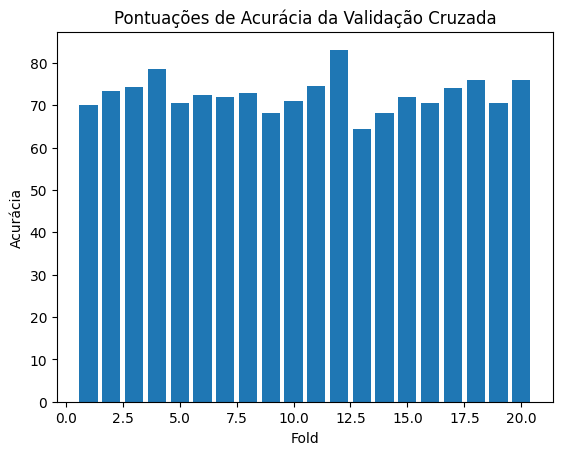

In [ ]:
plt.bar(range(1, len(pontuacoes_percentuais) + 1), pontuacoes_percentuais)
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.title('Pontuações de Acurácia da Validação Cruzada')
plt.show()

**Utilizando a Regressão Logística**

In [ ]:
# Importando a regressão logística
from sklearn.linear_model import LogisticRegression

In [ ]:
# Criando o nosso classificador # Fazendo o fit com os dados
clfLog = LogisticRegression(random_state=0, max_iter=1000).fit(x, y)

In [ ]:
# Avaliando o modelo
clfLog.score(x,y)

0.8317713214620431

**Avaliando modelos de classificação**
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
Para isso, vamos usar os dados de teste

Tentar entender quais variavéis desse conjunto de dados são mais relevantes ao óbito por cid/doença.





* ATESTADO = CIDs informados no atestado. (Códigos CID 10)
* CID B34.2 – INFECÇÃO POR CORONAVÍRUS DE LOCALIZAÇÃO NÃO ESPECIFICADA
* IDADE
* INSTRUCAO = Instrução, conforme a tabela: 1979 (C 9)
 * 0: Ignorado
 *1: Nenhuma
 *2: Primeiro grau
 *3: Segundo grau
 *4: Superior
* OCUPACAO =Ocupação, conforme a Classificação Brasileira de Ocupações (CBO)
* RACACOR =Cor informada pelo responsável pelas informações do falecido. (1 – Branca; 2
– Preta; 3 – Amarela; 4 – Parda; 5 – Indígena)
* SEXO =Sexo do falecido. “Ignorado” selecionada em casos especiais como cadáveres mutilados, em estado avançado de decomposição, genitália indefinida ou hermafroditismo. (M – masculino; F – feminino; I - ignorado)





C34 - Neoplasia Maligna dos Brônquios e dos Pulmões
C18 Neoplasia maligna do cólon
C22 - Neoplasia maligna do fígado e das vias biliares intra-hepáticas
C16 - Neoplasia maligna do estômago
C50 – Neoplasia Maligna da Mama

LINHAAA = CIDs informados na Linha
A da DO referente ao diagnóstico na Linha A da
DO (causa terminal - doença ou estado mórbido que causou diretamente
a
morte). (Códigos CID 10